# BUSSINESS UNDERSTANDING

Pembuatan model klasifikasi stroke dengan algoritma regresi linear bertujuan untuk membantu identifikasi faktor risiko dan prediksi kemungkinan seseorang terkena stroke. Model ini memanfaatkan variabel seperti usia, tekanan darah, kadar glukosa dan indeks massa tubuh (BMI). Dengan menggunakan model ini, tenaga medis dapat melakukan deteksi dini dan memberikan perawatan yang tepat kepada individu yang berisiko tinggi, mengurangi angka kejadian stroke, dan meningkatkan kualitas hidup pasien.

Penerapan model ini dapat meningkatkan kesadaran masyarakat tentang faktor-faktor risiko stroke. Dengan pendekatan prediktif ini, dokter dan lembaga kesehatan dapat melakukan pencegahan, diagnosis, dan pengobatan dini yang lebih efektif, sehingga mengurangi dampak negatif yang disebabkan oleh stroke. Model ini memberikan informasi yang lebih baik kepada tenaga medis dalam mengidentifikasi kelompok berisiko tinggi, sehingga tindakan pencegahan yang tepat dapat diambil untuk mencegah stroke dan meningkatkan prognosis pasien.

In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [29]:
df = pd.read_excel('data.xlsx')

# DATA UNDERSTANDING

deskripsi tabel:

AGE = Umur Pasien

TENSI = Apakah tensi pasien tinggi (1 = ya dan 0 = tidak)

JANTUNG	= Apakah pasien memiliki riwayat penyakit jantung (1 = ya dan 0 = tidak)

GLUKOSA	= Kadar glukosa pasien

BMI	= indeks massa tubuh pasien

STRUK = Apakah pasien berpotensi terkena struk (1 = ya dan 0 = tidak)

In [30]:
df['JANTUNG'].unique()

array([1, 0])

In [31]:
df.head()

,IDE,AGE,TENSI,JANTUNG,GLUKOSA,BMI,STRUK
0,9046,67,0,1,228.690000,1.504167,1
1,31112,80,0,1,105.920000,1.336806,1
2,60182,49,0,0,7.140972,1.419444,1
3,1665,79,1,0,7.258333,24.000000,1
4,56669,81,0,0,7.764583,29.000000,1


In [32]:
df.shape

(3424, 7)

In [33]:
df['STRUK'].value_counts()

0    3232
1     192
Name: STRUK, dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   IDE      3424 non-null   int64  
 1   AGE      3424 non-null   int64  
 2   TENSI    3424 non-null   int64  
 3   JANTUNG  3424 non-null   int64  
 4   GLUKOSA  3424 non-null   float64
 5   BMI      3424 non-null   float64
 6   STRUK    3424 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 187.4 KB


In [35]:
df.isnull().sum()

IDE        0
AGE        0
TENSI      0
JANTUNG    0
GLUKOSA    0
BMI        0
STRUK      0
dtype: int64

In [36]:
df.duplicated().sum()

0

# DATA PREPROSESSING

In [37]:
df = df.drop(['IDE'], axis=1)

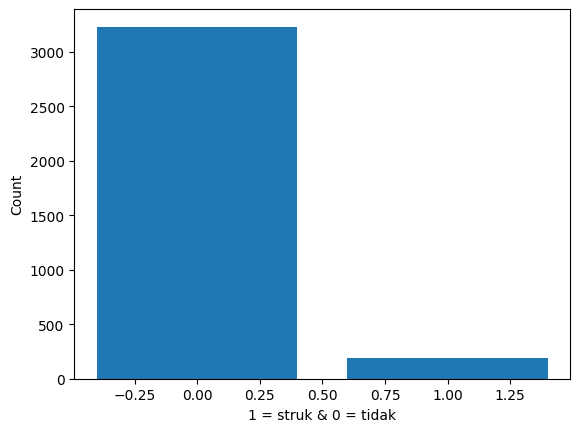

In [38]:
data_stroke= df['STRUK'].value_counts()
plt.bar(data_stroke.index, data_stroke.values)
plt.xlabel('1 = struk & 0 = tidak')
plt.ylabel('Count')
plt.show()

# MODELLING

In [39]:
X = df.drop(columns='STRUK', axis=1)
Y = df['STRUK']

In [40]:
print(X)

      AGE  TENSI  JANTUNG     GLUKOSA        BMI
0      67      0        1  228.690000   1.504167
1      80      0        1  105.920000   1.336806
2      49      0        0    7.140972   1.419444
3      79      1        0    7.258333  24.000000
4      81      0        0    7.764583  29.000000
...   ...    ...      ...         ...        ...
3419   57      0        0   76.620000   1.168056
3420   82      1        0   71.970000   1.168750
3421   57      0        0   77.930000   0.879861
3422   81      0        0    5.209722  40.000000
3423   51      0        0    6.936806   1.045833

[3424 rows x 5 columns]


In [41]:
print(Y)

0       1
1       1
2       1
3       1
4       1
       ..
3419    0
3420    0
3421    0
3422    0
3423    0
Name: STRUK, Length: 3424, dtype: int64


In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=2)

In [43]:
print(X.shape, X_train.shape, X_test.shape)

(3424, 5) (2739, 5) (685, 5)


In [44]:
model = LogisticRegression()

In [45]:
model.fit(X_train, Y_train)

LogisticRegression()

In [46]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [47]:
print("Akurasi data training : ", training_data_accuracy*100)

Akurasi data training :  94.34100036509675


In [48]:
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [49]:
print("Akurasi data testing : ", testing_data_accuracy*100)

Akurasi data testing :  94.45255474452556


# EVALUATION

In [50]:
#input_data = (42,0,0,82.670000,0.920139) #0
input_data = (80,0,1,105.920000,1.336806) #0

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
    print('kemungkinan terkena stroke lebih kecil')
else :
    print('kemungkinan terkena stroke lebih besar')

[0]
kemungkinan terkena stroke lebih kecil


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# DEPLOYMENT

In [51]:
import pickle

In [52]:
filename = 'stroke.sav'
pickle.dump(model, open(filename, 'wb'))